## Airline cost - STAT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('airline cost new.csv')
df.head()

,num_pass,cost
0,61,4280
1,63,4080
2,67,4420
3,69,4170
4,70,4480


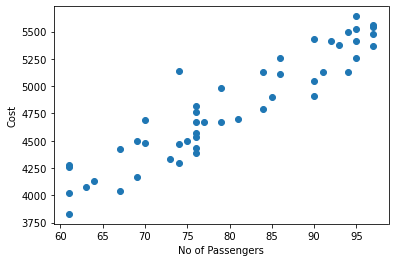

In [4]:
plt.scatter(df['num_pass'],df['cost'])
plt.xlabel('No of Passengers')
plt.ylabel('Cost')
plt.show()

In [5]:
## Cost = c + alpha*(No of passengers)
## c = fixed cost (acc to accounting)
## alpha = variable cost (acc to accounting)

### Objective : Build a model => Cost = C + m*(No of passengers)
#### where 
#### C is the fixed cost (Cost incurred by the airline,even if no passenger flies)
#### m is the variable cost (cost per passenger) (or also called as slope of the line)

In [10]:
import statsmodels.api as sm

In [12]:
y = df['cost']
x = df['num_pass']
Xc = sm.add_constant(x)
Xc.head()

,const,num_pass
0,1.0,61
1,1.0,63
2,1.0,67
3,1.0,69
4,1.0,70


In [13]:
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     302.2
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           4.23e-22
Time:                        11:58:47   Log-Likelihood:                -323.87
No. Observations:                  49   AIC:                             651.7
Df Residuals:                      47   BIC:                             655.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1612.9763    185.831      8.680      0.000    1239.133    1986.820
num_pass      39.8941      2.295     17.383      0.000      35.277      44.511
==============================================================================
Omnibus:                        3.612   Durbin-Watson:                   2.624
Prob(Omnibus):                  0.164   Jarque-Bera (JB):                2.700
Skew:                           0.556   Prob(JB):                        0.259
Kurtosis:                       3.296   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
## Cost = c + alpha*(No of passengers)
## Cost = 1612 + (39.8941)*(No of passengers)

In [15]:
# H0 : Coefficient of no of passengers = 0 i.e, b = 0
# H1 : Coefficient of no of passengers <> 0 i.e, b <> 0

In [16]:
## 0.000 is the probability of getting b(No of passengers) >=39.89 and b(No of passengers)<=-39.89 when H0 is true.
## Since this probability <= 0.05 (significance level),we will reject H0

## Virginia semiconductors - STAT

In [29]:
df1 = pd.read_csv('virginia semiconductors.csv')
df1.head()

,Size_of_Purchase,Company_Size,%Imports,Distance,Central_Purchaser
0,27.9,25.6,41,18,0
1,89.6,109.8,16,75,0
2,12.8,39.4,29,14,0
3,34.9,16.7,31,117,0
4,408.6,278.4,14,209,1


In [30]:
## Size_Of_Purchase = C + alpha1*company_size + alpha2*imports + alpha3*distance + alpha4*central_purchase

In [31]:
# 'Size_of_Purchase' = C + b1*'Company_Size' + b2*'%Imports' + b3*'Distance' + b4*'Central_Purchaser'

In [32]:
y = df1['Size_of_Purchase']
x = df1.drop('Size_of_Purchase',axis=1)
Xc = sm.add_constant(x)
Xc.head()

,const,Company_Size,%Imports,Distance,Central_Purchaser
0,1.0,25.6,41,18,0
1,1.0,109.8,16,75,0
2,1.0,39.4,29,14,0
3,1.0,16.7,31,117,0
4,1.0,278.4,14,209,1


In [33]:
model1 = sm.OLS(y,Xc).fit()
model1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Size_of_Purchase   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     55.00
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           1.28e-07
Time:                        14:34:39   Log-Likelihood:                -82.436
No. Observations:                  17   AIC:                             174.9
Df Residuals:                      12   BIC:                             179.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.6686     30.107     -0.122      0.905     -69.266      61.929
Company_Size          1.2687      0.200      6.355      0.000       0.834       1.704
%Imports              0.0508      0.865      0.059      0.954      -1.834       1.936
Distance             -0.2204      0.256     -0.860      0.407      -0.779       0.338
Central_Purchaser   127.3502     23.880      5.333      0.000      75.321     179.380
==============================================================================
Omnibus:                        2.223   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.588
Skew:                          -0.727   Prob(JB):                        0.452
Kurtosis:                       2.640   Cond. No.                         542.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# H0 : b(distance) = 0
# H1 : b(distance) <> 0

In [35]:
# NOTE : We notice that coefficient of Distance and Imports are not significant (p>0.05). 
# Hence these two variables will be dropped from the model


In [36]:
y = df1['Size_of_Purchase']
x = df1.drop(['Size_of_Purchase','%Imports','Distance'],axis=1)
Xc = sm.add_constant(x)
Xc.head()

,const,Company_Size,Central_Purchaser
0,1.0,25.6,0
1,1.0,109.8,0
2,1.0,39.4,0
3,1.0,16.7,0
4,1.0,278.4,1


In [37]:
model1 = sm.OLS(y,Xc).fit()
model1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Size_of_Purchase   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     114.7
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           2.09e-09
Time:                        14:46:47   Log-Likelihood:                -83.341
No. Observations:                  17   AIC:                             172.7
Df Residuals:                      14   BIC:                             175.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -8.5394     15.758     -0.542      0.596     -42.338      25.259
Company_Size          1.1961      0.146      8.182      0.000       0.883       1.510
Central_Purchaser   126.9089     21.396      5.931      0.000      81.019     172.799
==============================================================================
Omnibus:                        2.894   Durbin-Watson:                   1.423
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                2.284
Skew:                          -0.830   Prob(JB):                        0.319
Kurtosis:                       2.318   Cond. No.                         320.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
## r_squared = 0.942
## This suggests that 94.2% of variation in the size of purchase data is explained by the model(company_size and central_purchase)


In [41]:
## f_Test
# H0 : b(company_size)=b(CP)=0
# H1 : b(comapny_size) <> b(CP) <> 0 (at least one coeff is not zero)

# f-value = 114.7(prob = 2.09*10^(-9)). 2.09*10^(-9) is the probability of getting f>114.7 when H0 is true
# Since this prob <= 0.05, we will reject H0 to conclude that our model as a whole is significant